Classificação com dados desbalanceados

Carregamento da base de dados

In [30]:
import pandas as pd
import random
import numpy as np

In [31]:
dataset = pd.read_csv('credit_data.csv')

In [32]:
dataset.shape

(2000, 5)

In [34]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [35]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

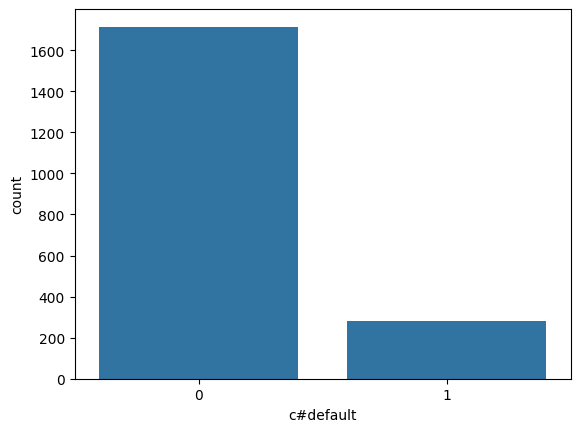

In [36]:
import seaborn as sns
sns.countplot(x=dataset['c#default']);

In [38]:
x = dataset.iloc[:, 1:4].values
x.shape

(1997, 3)

In [40]:
y = dataset.iloc[:, 4].values
y.shape

(1997,)

Base de treinamento e teste

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y)

In [43]:
x_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [44]:
x_teste.shape, y_teste.shape

((400, 3), (400,))

In [45]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [46]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [47]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [48]:
226 / len(y_treinamento)

0.14151534126487164

In [49]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [50]:
57 / len(y_teste)

0.1425

Classificação com Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

In [54]:
#Instanciar o modelo 
modelo = GaussianNB()
#Treinar o modelo 
modelo.fit(x_treinamento, y_treinamento)

GaussianNB()

In [58]:
# x é nossa previsão 
previsoes = modelo.predict(x_teste)
previsoes

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [59]:
#Resposta que esta na base de dados (y)
y_teste

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [61]:
# Comparativo x (previsao) y (resposta do banco de dados)
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(y_teste, previsoes)

0.94

In [63]:
from sklearn.metrics import confusion_matrix

In [88]:
#Matriz de confusão
cm = confusion_matrix(y_teste, previsoes)
cm

array([[342,   1],
       [ 23,  34]])

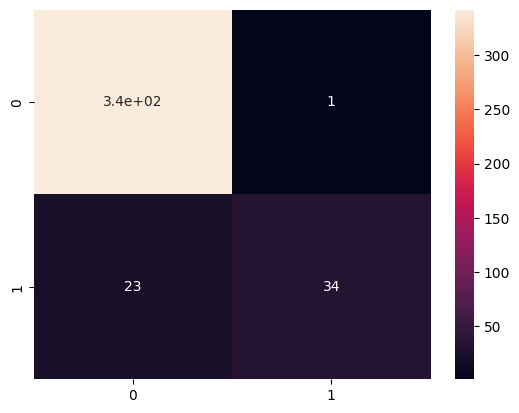

In [89]:
sns.heatmap(cm, annot=True);

In [69]:
#accuracy manual
accuracy_score_manual = (342 + 34) / (342 + 34 + 24 + 1)
accuracy_score_manual

0.9376558603491272

In [70]:
# Percentual de acerto para pessoas que pagam o empréstimo
342 / (342 + 1)

0.9970845481049563

In [90]:
# Percentual de acerto para pessoas que não pagam o empréstimo
34 / (34 + 23)

0.5964912280701754

Simulação

In [91]:
# Clientes não pagadores : 1.000
# De 1000 clientes não pagadores, concede emprestimo para:
conceder_emprestimo = (1000 * 41) / 100
conceder_emprestimo

410.0